In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_curve

In [45]:
results = pd.read_csv('./Mixmatch/results.csv', header=None)
labels = results.iloc[:,0]
pred = results.iloc[:,1:]

In [46]:
def plot_figure(plot, x_label, x_values, y_label, y_values):
  plot.set_xlabel(x_label)
  plot.set_ylabel(y_label)
  plot.set_xlim(0, 1.0)
  plot.set_ylim(0, 1.0)
  plot.set_yticks(np.arange(0, 1.0, 0.05))
  plot.set_xticks(np.arange(0, 1.0, 0.05))
  plot.grid()
  plot.plot(x_values, y_values)

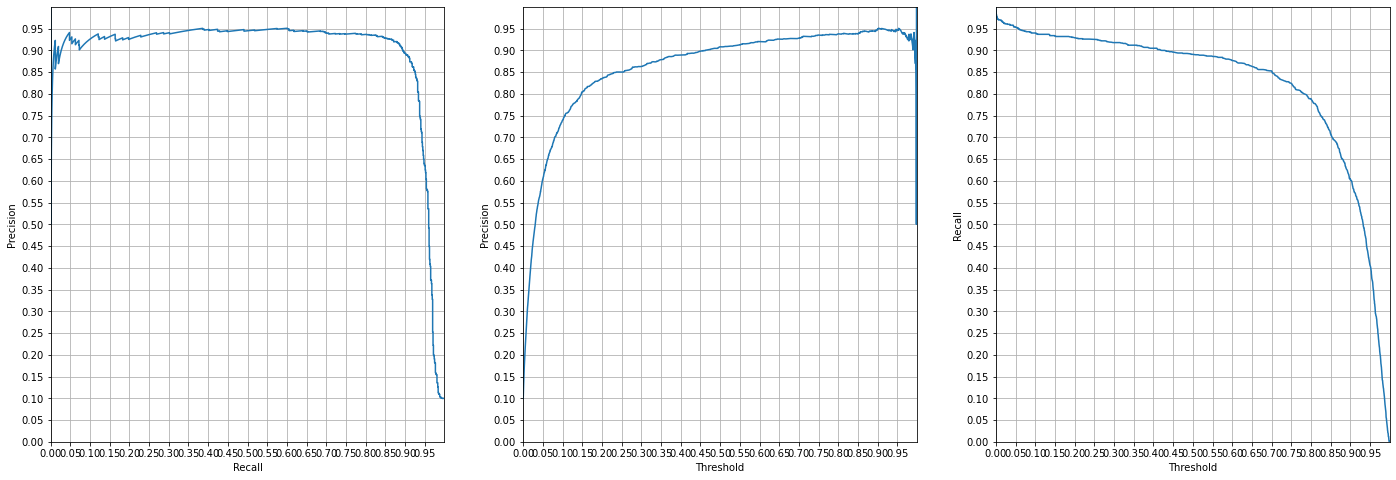

In [47]:
CLASS_LABEL = 0
SCREEN_WIDTH = 24

bool_labels = labels.apply(lambda x: x==CLASS_LABEL)
filter_pred = pred[pred.columns[CLASS_LABEL]]
precision, recall, thresholds = precision_recall_curve(bool_labels, filter_pred)

fig = plt.figure(figsize=(SCREEN_WIDTH, SCREEN_WIDTH / 3))
plot1 = fig.add_subplot(1,3,1)
plot_figure(plot1, "Recall", recall, "Precision", precision)

plot2 = fig.add_subplot(1,3,2)
# last element in precision is 1
plot_figure(plot2, "Threshold", thresholds, "Precision", precision[:-1])

plot3 = fig.add_subplot(1,3,3)
# last element in recall is 0
plot_figure(plot3, "Threshold", thresholds, "Recall", recall[:-1])